In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Checklist da análise exploratória
- [x] Plot de quantidade de reclamações por bairro
- [x] Plot de status de atendimento por RPA
- [x] Plot de de quantidade de tipos de atendimento por RPA 
- [ ] Plot de menor/maior/médio tempo para completar atendimento por RPA
- [ ] Plot de tipo de problema mais/menos resolvido
- [ ] Plot de ruas com mais reclamações

In [2]:
#Loading Data
emlurb_url = './data/156cco2018.csv'
bairros_url = './data/bairros.geojson'
logradouros_url = './data/trechoslogradouros.geojson'


emlurb_df = pd.read_csv(emlurb_url, sep=';', error_bad_lines=False, warn_bad_lines=True, encoding='latin-1')

In [14]:
#Display DataFrame's Cell
display(emlurb_df.mode())

,GRUPOSERVICO_CODIGO,GRUPOSERVICO_DESCRICAO,SERVICO_CODIGO,SERVICO_DESCRICAO,LOGRADOURO,NUMERO,BAIRRO,RPA,DATA_DEMANDA,SITUACAO,DATA_ULT_SITUACAO
0,17,ILUMINAÇÃO PÚBLICA,25,MANUTENÇÃO EM LÂMPADA APAGADA,RUA PROJETADA,00,BOA VIAGEM,6,2018-03-07,ATENDIDA,2018-11-14


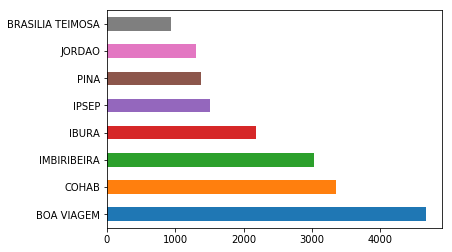

In [26]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([6])])['BAIRRO'].value_counts().plot.barh()

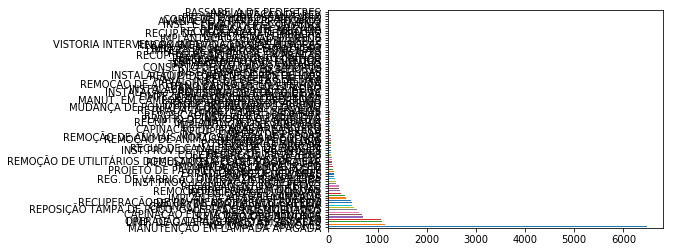

In [15]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([6])])['SERVICO_DESCRICAO'].value_counts().plot.barh()

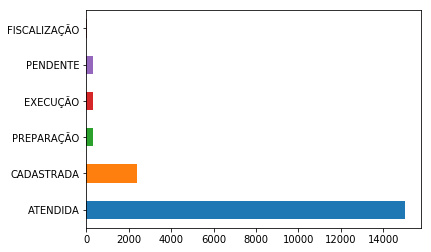

In [8]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([6])])['SITUACAO'].value_counts().plot.barh()

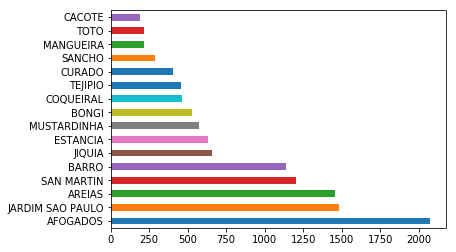

In [73]:
(emlurb_df.loc[emlurb_df['RPA'].isin([5])])['BAIRRO'].value_counts().plot.barh()

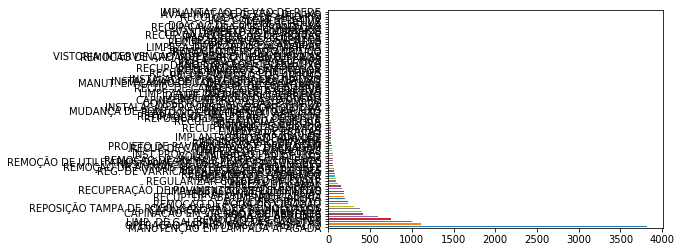

In [17]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([5])])['SERVICO_DESCRICAO'].value_counts().plot.barh()

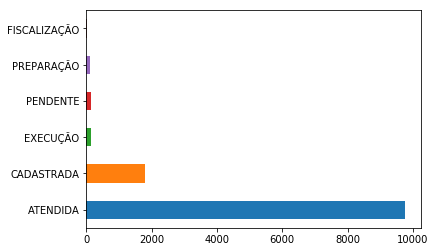

In [9]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([5])])['SITUACAO'].value_counts().plot.barh()

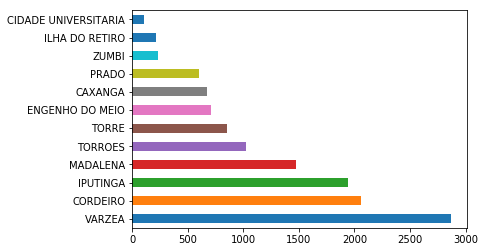

In [75]:
(emlurb_df.loc[emlurb_df['RPA'].isin([4])])['BAIRRO'].value_counts().plot.barh()

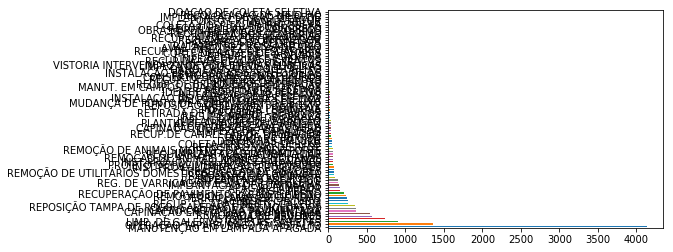

In [18]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([4])])['SERVICO_DESCRICAO'].value_counts().plot.barh()

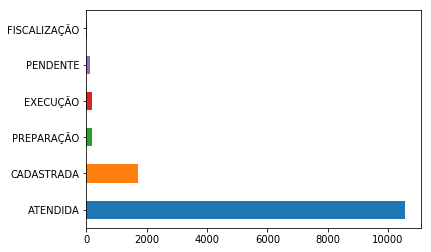

In [10]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([4])])['SITUACAO'].value_counts().plot.barh()

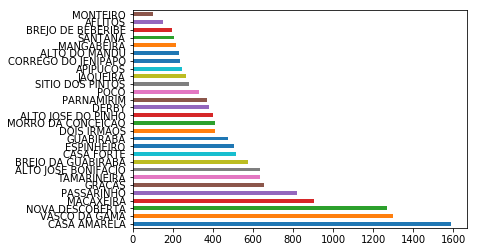

In [78]:
(emlurb_df.loc[emlurb_df['RPA'].isin([3])])['BAIRRO'].value_counts().plot.barh()

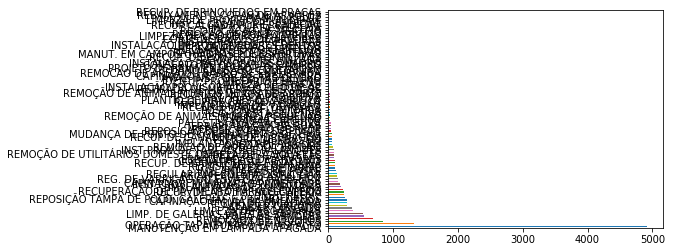

In [19]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([3])])['SERVICO_DESCRICAO'].value_counts().plot.barh()

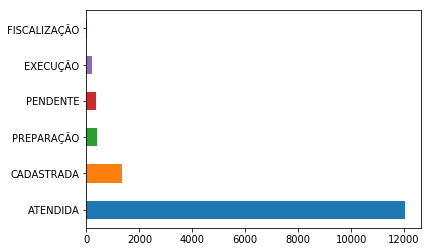

In [11]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([3])])['SITUACAO'].value_counts().plot.barh()

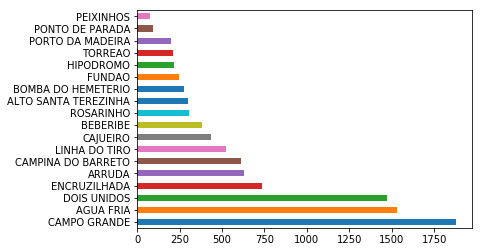

In [79]:
(emlurb_df.loc[emlurb_df['RPA'].isin([2])])['BAIRRO'].value_counts().plot.barh()

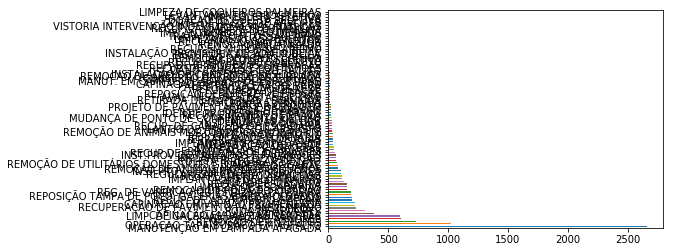

In [21]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([2])])['SERVICO_DESCRICAO'].value_counts().plot.barh()

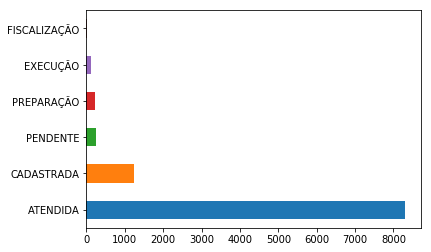

In [12]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([2])])['SITUACAO'].value_counts().plot.barh()

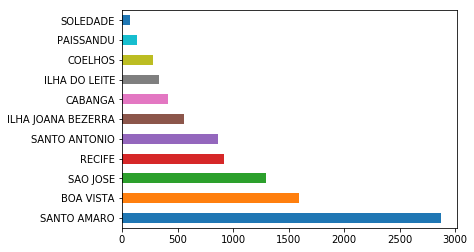

In [80]:
(emlurb_df.loc[emlurb_df['RPA'].isin([1])])['BAIRRO'].value_counts().plot.barh()

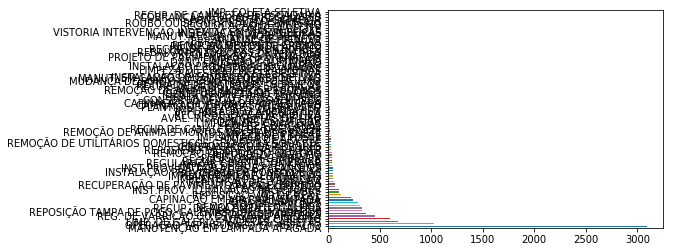

In [22]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([1])])['SERVICO_DESCRICAO'].value_counts().plot.barh()

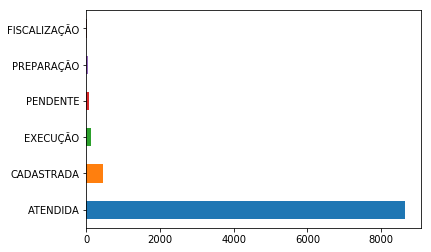

In [13]:
#Plot graphs
#(emlurb_df.loc[emlurb_df['RPA'].isin([6])])
(emlurb_df.loc[emlurb_df['RPA'].isin([1])])['SITUACAO'].value_counts().plot.barh()